# iFood

- What did you eat today? Wondering if you are eating a healthy diet? Automatic food identification can assist towards food intake monitoring to maintain a healthy diet.
- Food classification is a challenging problem due to the large number of food categories, high visual similarity between different food categories, as well as the lack of datasets that are large enough for training deep models.
- In this competition, we extend our last year's dataset to 251 fine-grained (prepared) food categories with 118,475 training images collected from the web.We provide human verified labels for both the validation set of 11,994 images and the test set of 28,377 images.
- The goal is to build a model to predict the fine-grained food-category label given an image.

## The main challenges are

### Fine-grained Classes: 

- The classes are fine-grained and visually similar. For example, the dataset has 15 different types of cakes, and 10 different types of pastas.

### Noisy Data:

- Since the training images are crawled from the web, they often include images of raw ingredients or processed and packaged food items. 
- This is referred to as cross-domain noise. 
- Further, due to the fine-grained nature of food-categories, a training image may either be incorrectly labeled into a visually similar class or be annotated with with a single label despite having multiple food items.

- This competition is part of the fine-grained visual-categorization workshop (FGVC6 workshop) at CVPR 2019. There is a Github page for the competition here. For any queries you can start a discussion topic here or email us at ifood2019@gmail.com.
- Participants who make a submission that beats the sample submission can fill out this form to receive $150 in Google Cloud credits.
- We would like to thank SRI International and Google for support in data collection and labeling. The challenge is sponsored by SRI International.

## Load required libraries

In [1]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
library(ggplot2)

In [3]:
library(openintro)

Loading required package: airports
Warning message:
"package 'airports' was built under R version 3.6.3"Loading required package: cherryblossom
Warning message:
"package 'cherryblossom' was built under R version 3.6.3"Loading required package: usdata


In [4]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'jsonlite' 1.6 is already loaded, but >= 1.7.2 is required


In [5]:
library(scales)

## To find current working directory

In [6]:
getwd()

[1] "C:/Users/Tanuja/R Program"

## To set required working directory

In [7]:
setwd("C:/Users/Tanuja/Downloads")

## Read the file

In [8]:
d<-read.csv("ifood.csv")

In [9]:
d

name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
Ghevar,"Flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom",vegetarian,15,30,sweet,dessert,Rajasthan,West
Gulab jamun,"Milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water",vegetarian,15,40,sweet,dessert,West Bengal,East
Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
Jalebi,"Maida, corn flour, baking soda, vinegar, curd, water, turmeric, saffron, cardamom",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,Delhi,North
Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,Uttar Pradesh,North


## To print top 5 rows of the data

In [10]:
head(d)

name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
Ghevar,"Flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom",vegetarian,15,30,sweet,dessert,Rajasthan,West
Gulab jamun,"Milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water",vegetarian,15,40,sweet,dessert,West Bengal,East
Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East


## To print bottom 5 rows of the data

In [11]:
tail(d)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
250,Shukto,"Green beans, bitter gourd, ridge gourd, banana, brinjal",vegetarian,10,20,spicy,main course,West Bengal,East
251,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
252,Bebinca,"Coconut milk, egg yolks, clarified butter, all purpose flour",vegetarian,20,60,sweet,dessert,Goa,West
253,Shufta,"Cottage cheese, dry dates, dried rose petals, pistachio, badam",vegetarian,35,40,sweet,dessert,Jammu & Kashmir,North
254,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all purpose flour",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central
255,Pinaca,"Brown rice, fennel seeds, grated coconut, black pepper, ginger powder",vegetarian,35,40,sweet,dessert,Goa,West


## To print column names

In [12]:
print(colnames(d))

[1] "name"           "ingredients"    "diet"           "prep_time"     
[5] "cook_time"      "flavor_profile" "course"         "state"         
[9] "region"        


## To show complete structure of data

In [13]:
print(str(d))

'data.frame':	255 obs. of  9 variables:
 $ name          : Factor w/ 255 levels "Adhirasam","Aloo gobi",..: 14 28 72 77 81 88 89 97 99 112 ...
 $ ingredients   : Factor w/ 252 levels "Aloo, tomatoes, mustard oil, bay leaf, cinnamon stick",..: 123 101 36 96 130 213 124 37 131 133 ...
 $ diet          : Factor w/ 2 levels "non vegetarian",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ prep_time     : int  45 80 15 15 15 10 10 10 20 10 ...
 $ cook_time     : int  25 30 60 30 40 50 50 20 30 40 ...
 $ flavor_profile: Factor w/ 5 levels "bitter","savour",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ course        : Factor w/ 4 levels "dessert","main course",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ state         : Factor w/ 26 levels "Andhra Pradesh",..: 26 20 19 20 26 26 24 5 26 24 ...
 $ region        : Factor w/ 6 levels "Central","East",..: 2 6 3 6 2 2 3 3 2 3 ...
NULL


## To check is there any missing values in data

In [14]:
print(sum(is.na(d)))

[1] 0


## To find statistical information of data

In [15]:
print(summary(d))

                name    
 Adhirasam        :  1  
 Aloo gobi        :  1  
 Aloo matar       :  1  
 Aloo methi       :  1  
 Aloo shimla mirch:  1  
 Aloo tikki       :  1  
 (Other)          :249  
                                                                    ingredients 
 Arbi ke patte, sesame seeds, gur, bengal gram flour, imli                :  2  
 Chhena, sugar, ghee                                                      :  2  
 Gram flour, ghee, sugar                                                  :  2  
 Aloo, tomatoes, mustard oil, bay leaf, cinnamon stick                    :  1  
 Aloo, urad dal, mustard, ginger, curry leaves                            :  1  
 Amaranth leaves, split urad dal, mustard seeds, grated coconut, red chili:  1  
 (Other)                                                                  :246  
             diet       prep_time        cook_time      flavor_profile
 non vegetarian: 29   Min.   :  5.00   Min.   :  2.00   bitter:  4    
 vegetaria

## To show names of food items


In [17]:
print(unique(d$name))

  [1] Balu shahi                   Boondi                      
  [3] Gajar ka halwa               Ghevar                      
  [5] Gulab jamun                  Imarti                      
  [7] Jalebi                       Kaju katli                  
  [9] Kalakand                     Kheer                       
 [11] Laddu                        Lassi                       
 [13] Nankhatai                    Petha                       
 [15] Phirni                       Rabri                       
 [17] Sheera                       Singori                     
 [19] Sohan halwa                  Sohan papdi                 
 [21] Chhena jalebi                Chhena kheeri               
 [23] Chhena poda                  Cham cham                   
 [25] Kheer sagar                  Ledikeni                    
 [27] Lyangcha                     Malapua                     
 [29] Mihidana                     Misti doi                   
 [31] Pantua                       Pithe

## To find the total time taken for each food items

In [18]:
name=d %>% group_by(name) %>% summarise(Total_Time=max(prep_time+cook_time),
                                        prep_time,cook_time, flavor_profile,course) %>% arrange(desc(Total_Time))

In [19]:
name

name,Total_Time,prep_time,cook_time,flavor_profile,course
Shrikhand,730,10,720,sweet,dessert
Pindi chana,620,500,120,spicy,main course
Puttu,535,495,40,savour,main course
Misti doi,510,480,30,sweet,dessert
Dosa,450,360,90,spicy,snack
Idli,450,360,90,spicy,snack
Masala Dosa,450,360,90,spicy,snack
Poornalu,300,240,60,sweet,dessert
Chak Hao Kheer,285,240,45,sweet,dessert
Tandoori Chicken,270,240,30,spicy,main course


# Diet

## To show the unique values in diet columns


In [20]:
print(unique(d$diet))

[1] vegetarian     non vegetarian
Levels: non vegetarian vegetarian


## To find the frequency of categorical values in diet


In [21]:
table(d$diet)


non vegetarian     vegetarian 
            29            226 

## To extract vegetarian foods


In [22]:
veg<-subset(d,diet=='vegetarian')
veg

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
1,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
2,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
3,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
4,Ghevar,"Flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom",vegetarian,15,30,sweet,dessert,Rajasthan,West
5,Gulab jamun,"Milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water",vegetarian,15,40,sweet,dessert,West Bengal,East
6,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
7,Jalebi,"Maida, corn flour, baking soda, vinegar, curd, water, turmeric, saffron, cardamom",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
8,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,Delhi,North
9,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
10,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,Uttar Pradesh,North


## To extract non vegetarian foods

In [23]:
non_veg<-subset(d,d$diet=="non vegetarian")
non_veg

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
65,Maach Jhol,"Fish, potol, tomato, chillies, ginger, garlic",non vegetarian,10,40,spicy,main course,Assam,North East
66,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,35,40,spicy,main course,Tripura,North East
68,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5,15,spicy,main course,Nagaland,North East
76,Biryani,"Chicken thighs, basmati rice, star anise, sweet, green chillies",non vegetarian,30,120,spicy,main course,Telangana,South
77,Butter chicken,"Chicken, greek yogurt, cream, garam masala powder, cashew nuts, butter",non vegetarian,10,35,spicy,main course,NCT of Delhi,North
80,Chicken razala,"Chicken, dahi, sesame seeds, garam masala powder, cashew nuts, saffron",non vegetarian,10,35,spicy,main course,West Bengal,East
81,Chicken Tikka masala,"Naan bread, tomato sauce, skinless chicken breasts, heavy cream, garam masala",non vegetarian,10,50,spicy,main course,Punjab,North
82,Chicken Tikka,"Chicken, whole wheat bread, rice flour, garam masala powder, whole egg",non vegetarian,120,45,spicy,starter,Punjab,North
123,Tandoori Chicken,"Greek yogurt, garam masala, kasuri methi, marinade, mustard oil",non vegetarian,240,30,spicy,main course,Punjab,North
124,Tandoori Fish Tikka,"Chickpea flour, biryani masala powder, yogurt, fish fillets, green bell pepper",non vegetarian,240,30,spicy,starter,Punjab,North


## To print names of vegetarian foods and non vegetarian foods


In [25]:
print(veg$name)

  [1] Balu shahi                   Boondi                      
  [3] Gajar ka halwa               Ghevar                      
  [5] Gulab jamun                  Imarti                      
  [7] Jalebi                       Kaju katli                  
  [9] Kalakand                     Kheer                       
 [11] Laddu                        Lassi                       
 [13] Nankhatai                    Petha                       
 [15] Phirni                       Rabri                       
 [17] Sheera                       Singori                     
 [19] Sohan halwa                  Sohan papdi                 
 [21] Chhena jalebi                Chhena kheeri               
 [23] Chhena poda                  Cham cham                   
 [25] Kheer sagar                  Ledikeni                    
 [27] Lyangcha                     Malapua                     
 [29] Mihidana                     Misti doi                   
 [31] Pantua                       Pithe

In [26]:
print(non_veg$name)

 [1] Maach Jhol           Pork Bharta          Galho               
 [4] Biryani              Butter chicken       Chicken razala      
 [7] Chicken Tikka masala Chicken Tikka        Tandoori Chicken    
[10] Tandoori Fish Tikka  Beef Fry             Chicken Varuval     
[13] Kolim Jawla          Bombil fry           Vindaloo            
[16] Kumol Sawul          Alu Pitika           Masor tenga         
[19] Bilahi Maas          Black rice           Chingri malai curry 
[22] Haq Maas             Chingri Bhape        Kabiraji            
[25] Koldil Chicken       Konir Dom            Koldil Duck         
[28] Masor Koni           Prawn malai curry   
255 Levels: Adhirasam Aloo gobi Aloo matar Aloo methi ... Zunka


## Pie diagram showing total number of vegetarian and non vegetarian foods


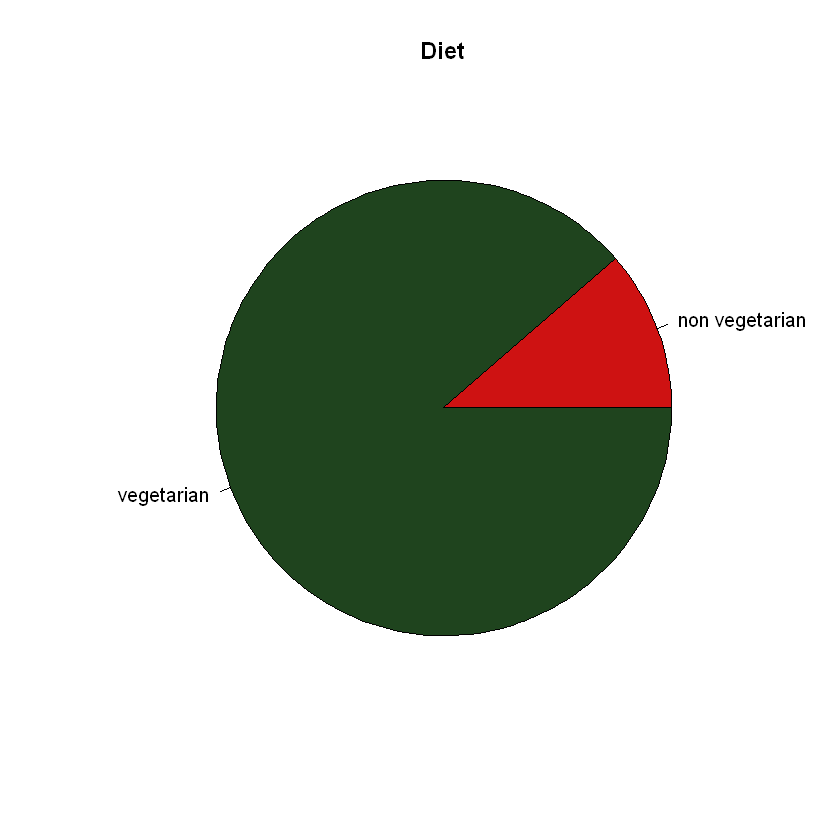

In [27]:
pie(table(d$diet),col = c('#CE1212','#1F441E'),main = "Diet")

## To find the average time taken for preparation of vegetarian foods & non vegetarian foods

In [28]:
print(mean(veg$prep_time))

[1] 34.80973


In [29]:
print(mean(non_veg$prep_time))

[1] 39.48276


## Boxplot showing preparation time for veg and non veg foods


Warning message:
"Use of `d$diet` is discouraged. Use `diet` instead."

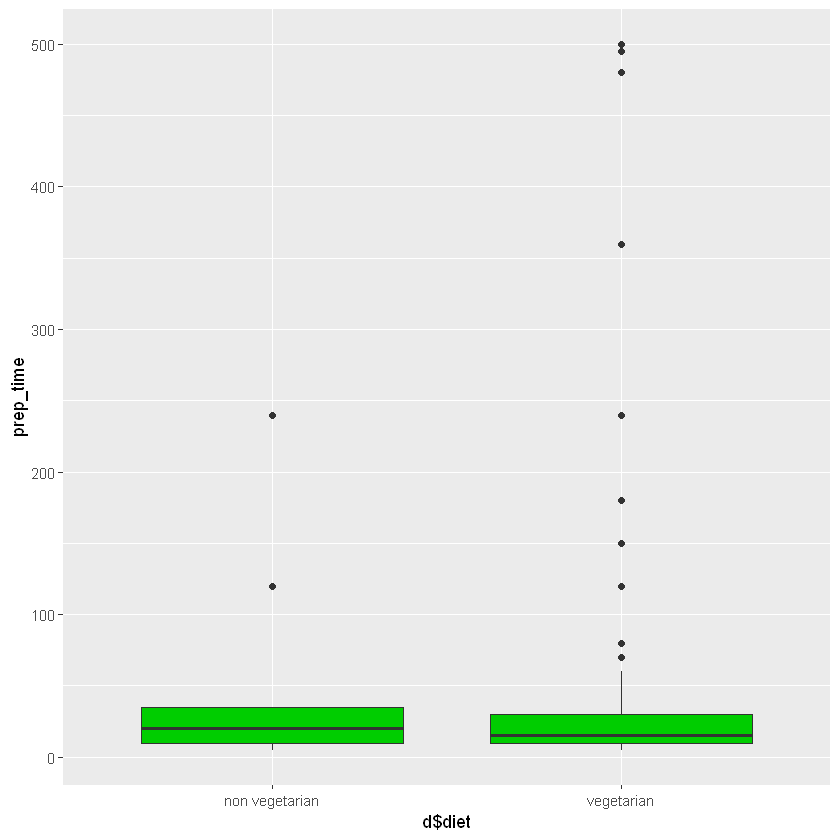

In [30]:
v_p<-ggplot(d,aes(x=d$diet,y=prep_time))+geom_boxplot(fill="green3")
print(v_p)

## To find the average time taken for cooking of vegetarian foods & non vegetarian foods


In [32]:
print(mean(veg$cook_time))

[1] 38.90708


In [33]:
print(mean(non_veg$cook_time))

[1] 40


Warning message:
"Use of `d$diet` is discouraged. Use `diet` instead."

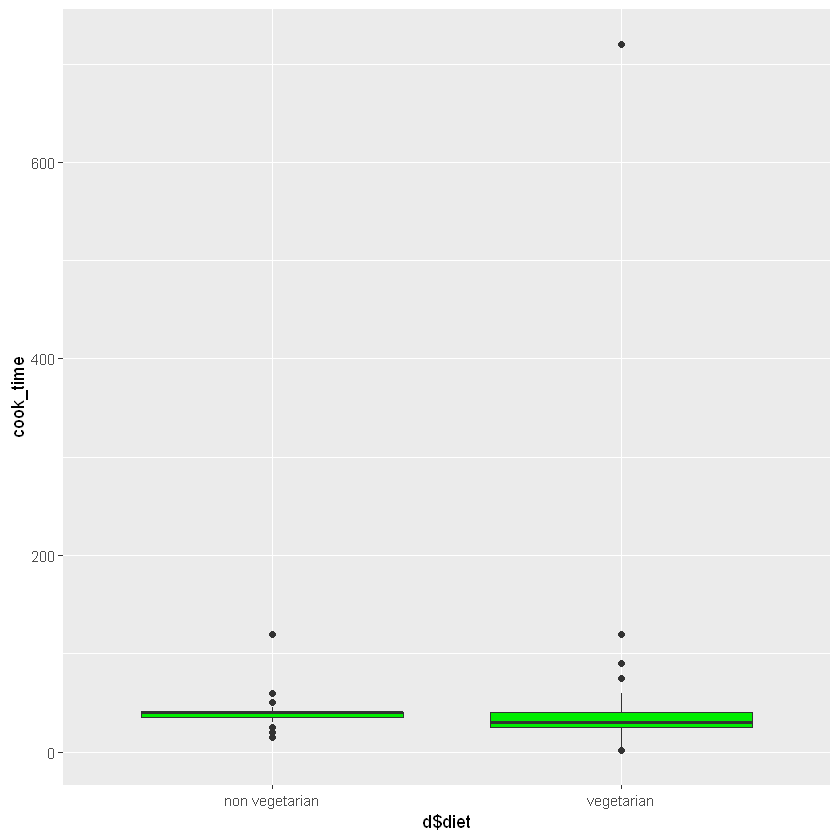

In [34]:
v_c<-ggplot(d,aes(x=d$diet,y=cook_time))+geom_boxplot(fill="green2")
print(v_c)

## To find the frequency of flavor profile in vegetarian and non vegetarian

In [35]:
print(table(veg$flavor_profile))


bitter savour   sour  spicy  sweet 
     4     26      1    107     88 


In [36]:
print(table(non_veg$flavor_profile))


bitter savour   sour  spicy  sweet 
     0      3      0     26      0 


## Barplot for showing flavours in each diet

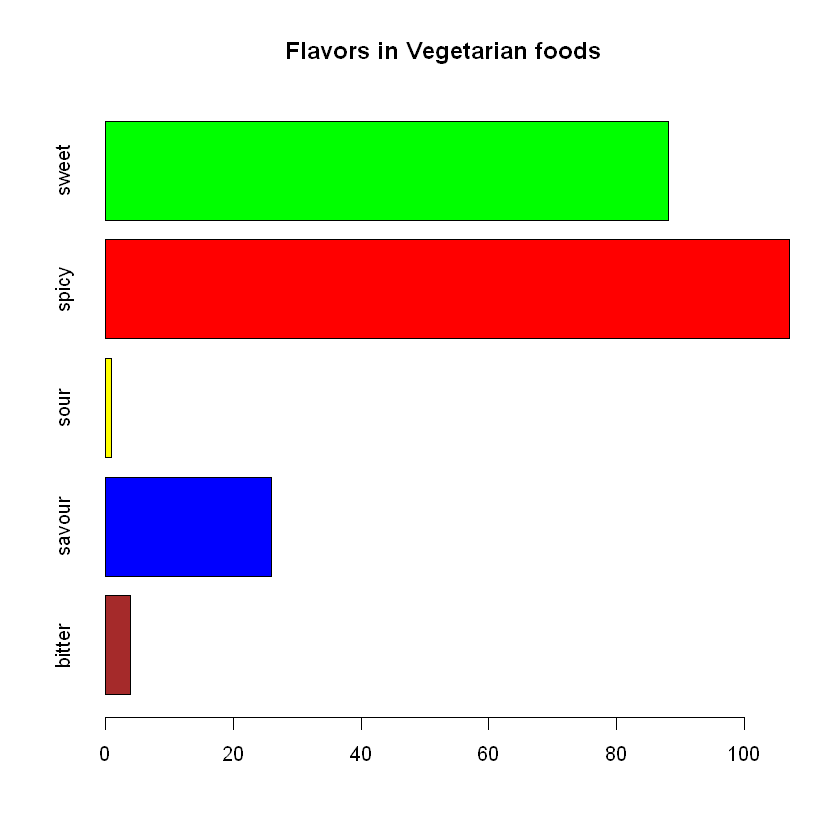

In [37]:
barplot(table(veg$flavor_profile),col=c('brown','blue','yellow','red','green'),horiz = TRUE,
        main = "Flavors in Vegetarian foods")


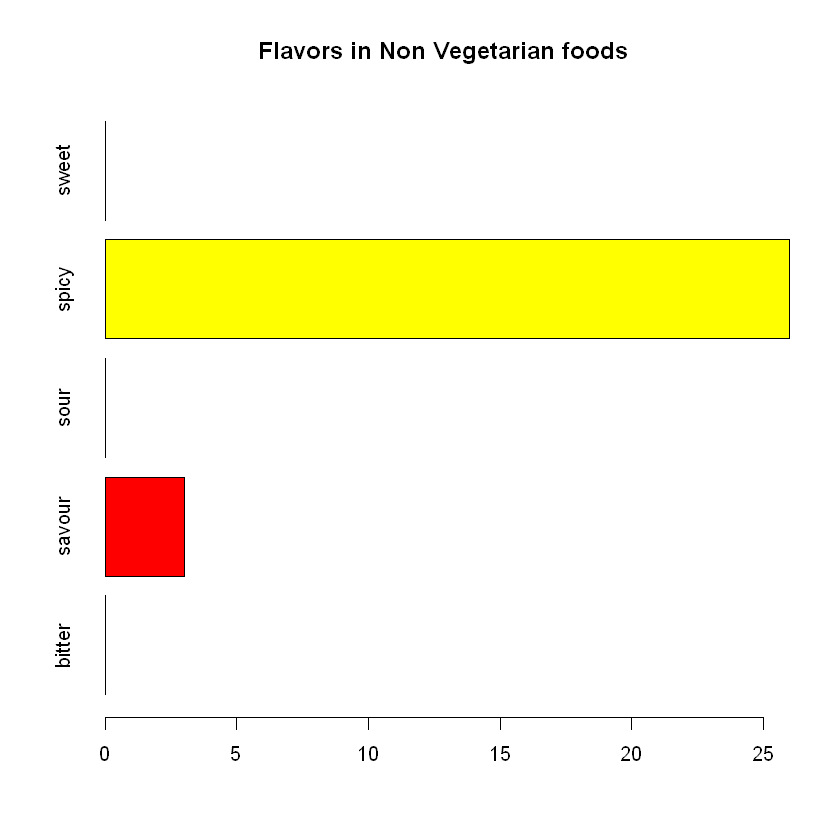

In [38]:
barplot(table(non_veg$flavor_profile),col=c('yellow','red','green'),horiz = TRUE,main = "Flavors in Non Vegetarian foods")

# Flavors

## To show the unique values in flavor profile


In [39]:
print(unique(d$flavor_profile))

[1] sweet  spicy  bitter savour sour  
Levels: bitter savour sour spicy sweet


## To find the frequency of each categorical values

In [40]:
table(d$flavor_profile)


bitter savour   sour  spicy  sweet 
     4     29      1    133     88 

## To extract the each flavor foods in the descending order of preparation time

In [41]:
sweet<-name %>% filter(flavor_profile=='sweet')%>% arrange(desc(prep_time))
sweet

name,Total_Time,prep_time,cook_time,flavor_profile,course
Misti doi,510,480,30,sweet,dessert
Poornalu,300,240,60,sweet,dessert
Chak Hao Kheer,285,240,45,sweet,dessert
Obbattu holige,240,180,60,sweet,main course
Ras malai,240,180,60,sweet,dessert
Boondi,110,80,30,sweet,dessert
Ledikeni,90,45,45,sweet,dessert
Pantua,90,45,45,sweet,dessert
Balu shahi,70,45,25,sweet,dessert
Kulfi falooda,70,45,25,sweet,dessert


In [42]:
spicy<-name %>% filter(flavor_profile=='spicy')%>% arrange(desc(prep_time))
spicy

name,Total_Time,prep_time,cook_time,flavor_profile,course
Pindi chana,620,500,120,spicy,main course
Dosa,450,360,90,spicy,snack
Idli,450,360,90,spicy,snack
Masala Dosa,450,360,90,spicy,snack
Tandoori Chicken,270,240,30,spicy,main course
Tandoori Fish Tikka,270,240,30,spicy,starter
Attu,175,150,25,spicy,snack
Chicken Tikka,165,120,45,spicy,starter
Idiappam,150,120,30,spicy,snack
Pesarattu,140,120,20,spicy,snack


In [43]:
bitter<-d %>% filter(flavor_profile=='bitter')%>% arrange(desc(prep_time))
bitter

name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
Karela bharta,"Bitter gourd, fennel, garam masala powder, chili powder, amchur powder",vegetarian,20,50,bitter,main course,Punjab,North
Methi na Gota,"Rava, gram flour, lemon juice, turmeric, fenugreek leaves",vegetarian,15,30,bitter,main course,Gujarat,West
Muthiya,"Bottle gourd, whole wheat flour, rava, sesame seeds, bengal gram flour",vegetarian,15,30,bitter,snack,Gujarat,West
Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10,40,bitter,main course,Punjab,North


In [44]:
sour<-name %>% filter(flavor_profile=='sour')%>% arrange(desc(prep_time))
sour

name,Total_Time,prep_time,cook_time,flavor_profile,course
Keri no ras,20,10,10,sour,main course


In [45]:
savour<-name %>% filter(flavor_profile=='savour')%>% arrange(desc(prep_time))
savour

name,Total_Time,prep_time,cook_time,flavor_profile,course
Puttu,535,495,40,savour,main course
Sandige,180,120,60,savour,main course
Sevai,150,120,30,savour,main course
Naan,90,60,30,savour,main course
Bengena Pitika,75,35,40,savour,main course
Black rice,75,35,40,savour,main course
Farsi Puri,75,35,40,savour,snack
Pakhala,75,35,40,savour,main course
Red Rice,75,35,40,savour,main course
Dahi vada,60,30,30,savour,snack


## To find the frequency of each course in each flavor foods

In [46]:
print(table(d$flavor_profile,d$course))

        
         dessert main course snack starter
  bitter       0           3     1       0
  savour       0          26     3       0
  sour         0           1     0       0
  spicy        0          96    35       2
  sweet       85           3     0       0


## ggplot showing course in each flavor

In [55]:
flavor_course=ggplot(d,aes(x=flavor_profile,y=course,fill=course))+geom_col()+
  ggtitle('Course in each Flavor')+coord_flip()+theme(legend.position = 'bottom',
                                                          axis.text.y =  element_text(size=6))

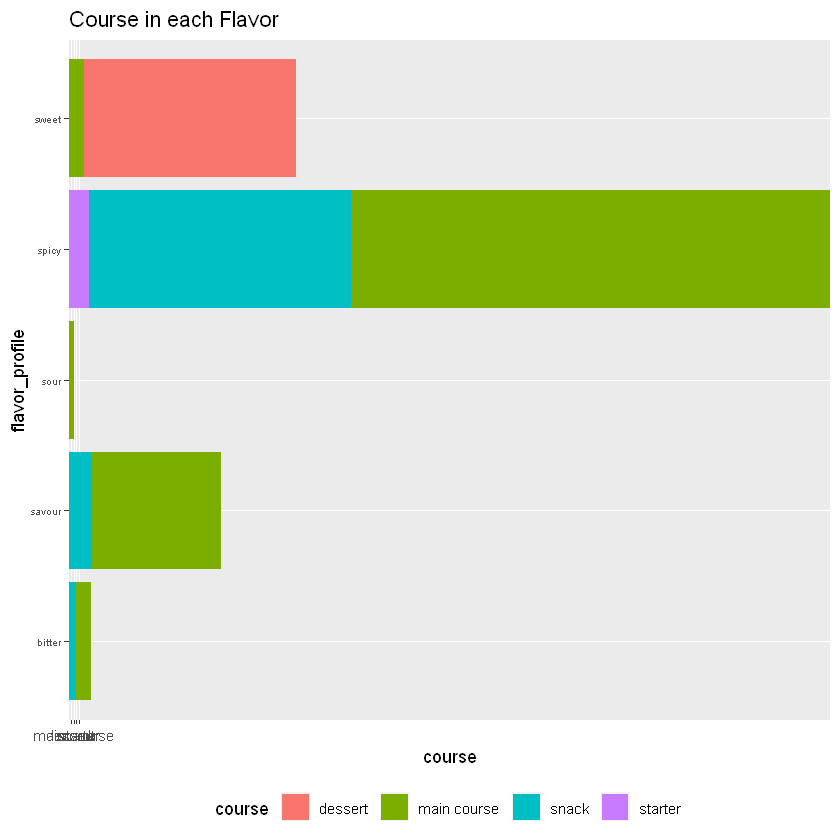

In [56]:
print(flavor_course)

# Course

## To print unique values in course

In [57]:
print(unique(d$course))

[1] dessert     main course starter     snack      
Levels: dessert main course snack starter


## To print the frequency of course in data


In [58]:
print(table(d$course))


    dessert main course       snack     starter 
         85         129          39           2 


## To find frequency of each flavor in each course


In [59]:
print(table(d$course,d$flavor_profile))

             
              bitter savour sour spicy sweet
  dessert          0      0    0     0    85
  main course      3     26    1    96     3
  snack            1      3    0    35     0
  starter          0      0    0     2     0


In [60]:
course_flavor=ggplot(d,aes(x=course,y=flavor_profile,fill=flavor_profile))+geom_col()+
  ggtitle('Flavors in each course')+coord_flip()+theme(legend.position = 'bottom',
                                                      axis.text.y =  element_text(size=6))

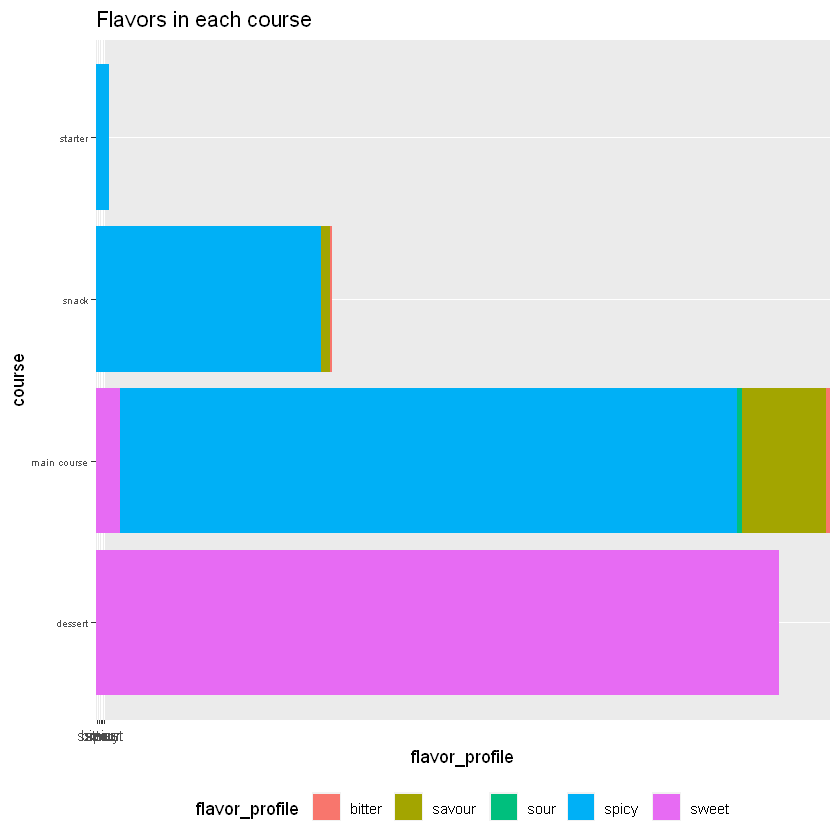

In [61]:
print(course_flavor)

# State wise

## To find the names of each states

In [62]:
print(unique(d$state))

 [1] West Bengal     Rajasthan       Punjab          Uttar Pradesh  
 [5] Delhi           Andhra Pradesh  Gujarat         Odisha         
 [9] Maharashtra     Uttarakhand     Assam           Bihar          
[13] Karnataka       Telangana       Kerala          Tamil Nadu     
[17] Tripura         Manipur         Nagaland        NCT of Delhi   
[21] Jammu & Kashmir Chhattisgarh    Haryana         Gujrat         
[25] Madhya Pradesh  Goa            
26 Levels: Andhra Pradesh Assam Bihar Chhattisgarh Delhi Goa Gujarat ... West Bengal


## To find the maximum number of diet in each states


In [65]:
State_diet=ggplot(d,aes(x=state,y=diet,fill=diet))+geom_col()+
  ggtitle('Statewise Diet Analysis')+coord_flip()+theme(legend.position = 'bottom',
                                                        axis.text.y =  element_text(size=6))

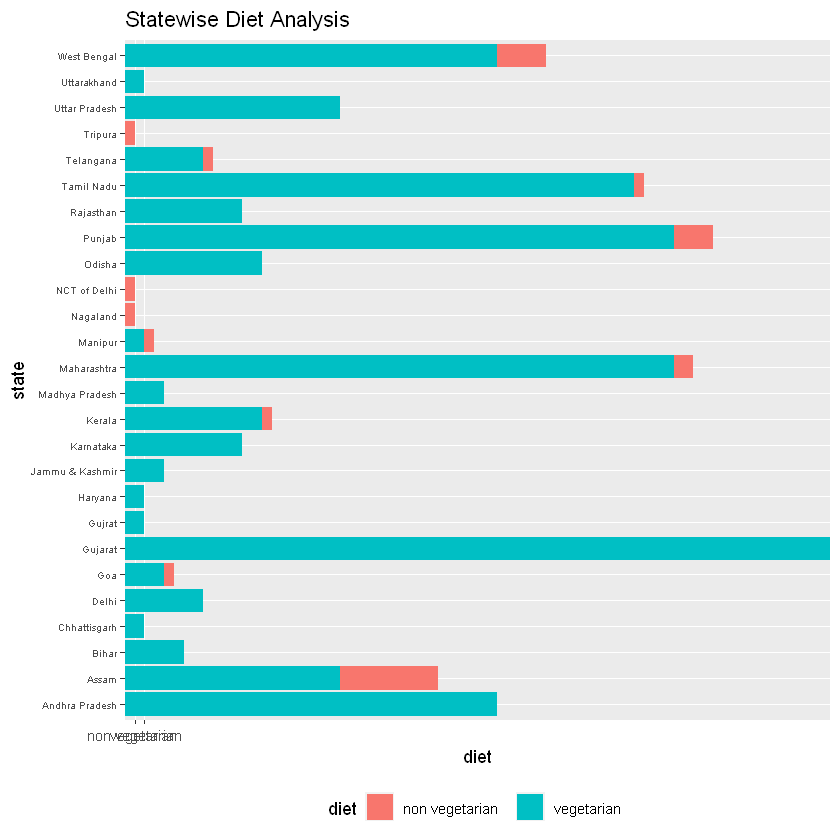

In [66]:
print(State_diet)

## To find the taste of each states


In [68]:
State_flavor=ggplot(d,aes(x=state,y=flavor_profile,fill=flavor_profile))+geom_col()+
  ggtitle('Statewise Flavor Analysis')+coord_flip()+theme(legend.position = 'bottom',
                                                          axis.text.y =  element_text(size=6))

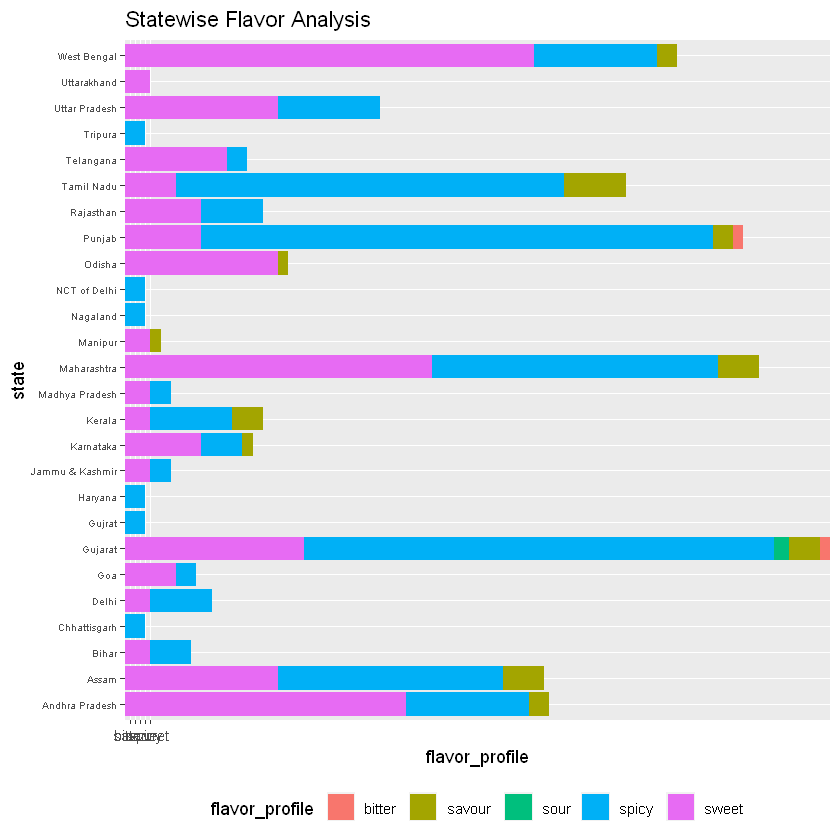

In [69]:
print(State_flavor)

## Course in each states


In [70]:
State_course=ggplot(d,aes(x=state,y=course,fill=course))+geom_col()+
  ggtitle('Statewise Course Analysis')+coord_flip()+theme(legend.position = 'bottom',
                                                          axis.text.y =  element_text(size=6))

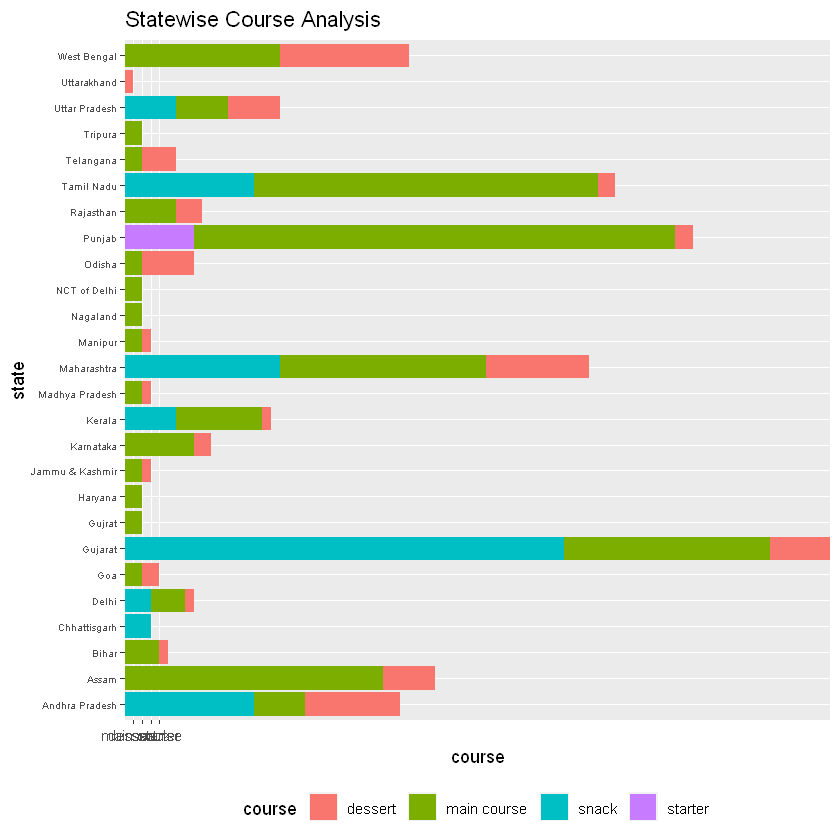

In [71]:
print(State_course)

# Region wise

## To print the names of regions


In [72]:
print(unique(d$region))

[1] East       West       North      South      North East Central   
Levels: Central East North North East South West


## To extract region wise food information

In [73]:
Central<-subset(d, region=='Central')
Central

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
90,Fara,"Chana dal, whole wheat flour, arhar dal, white urad dal, garam masala powder",vegetarian,10,60,spicy,snack,Chhattisgarh,Central
195,Laapsi,"Cinnamon, jaggery, clarified butter, dry roasted",vegetarian,10,40,spicy,main course,Madhya Pradesh,Central
254,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all purpose flour",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [74]:
East<-subset(d, region=='East')
East

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
1,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
5,Gulab jamun,"Milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water",vegetarian,15,40,sweet,dessert,West Bengal,East
6,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
9,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
15,Phirni,"Rice, sugar, nuts",vegetarian,30,20,sweet,dessert,Odisha,East
21,Chhena jalebi,"Chhena, sugar, ghee",vegetarian,10,50,sweet,dessert,Odisha,East
22,Chhena kheeri,"Chhena, sugar, milk",vegetarian,35,60,sweet,dessert,Odisha,East
23,Chhena poda,"Sugar, chenna cheese",vegetarian,10,45,sweet,dessert,Odisha,East
24,Cham cham,"Flour, cream, sugar, saffron, lemon juice, coconut flakes",vegetarian,40,60,sweet,dessert,West Bengal,East
25,Kheer sagar,"Chenna, condensed milk, sugar, saffron, cardamom",vegetarian,25,60,sweet,dessert,Odisha,East


In [75]:
North<-subset(d, region=='North')
North

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
3,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
7,Jalebi,"Maida, corn flour, baking soda, vinegar, curd, water, turmeric, saffron, cardamom",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
8,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,Delhi,North
10,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,Uttar Pradesh,North
12,Lassi,"Yogurt, milk, nuts, sugar",vegetarian,5,5,sweet,dessert,Punjab,North
14,Petha,"Firm white pumpkin, sugar, kitchen lime, alum powder",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North
16,Rabri,"Condensed milk, sugar, spices, nuts",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North
18,Singori,"Khoa, coconut, molu leaf",vegetarian,10,20,sweet,dessert,Uttarakhand,North
19,Sohan halwa,"Corn flour, ghee, dry fruits",vegetarian,10,60,sweet,dessert,Uttar Pradesh,North
28,Malapua,"Yoghurt, refined flour, ghee, fennel seeds",vegetarian,10,120,sweet,dessert,Bihar,North


In [76]:
North_East<-subset(d, region=='North East')
North_East

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
27,Lyangcha,"Flour, fried milk power, sugar syrup",vegetarian,20,30,sweet,dessert,Assam,North East
32,Pithe,"Rice flour, wheat flour",vegetarian,15,35,sweet,dessert,Assam,North East
65,Maach Jhol,"Fish, potol, tomato, chillies, ginger, garlic",non vegetarian,10,40,spicy,main course,Assam,North East
66,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,35,40,spicy,main course,Tripura,North East
67,Chak Hao Kheer,"Rice, milk, sugar, cardamom",vegetarian,240,45,sweet,dessert,Manipur,North East
68,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5,15,spicy,main course,Nagaland,North East
222,Gheela Pitha,"Sticky rice, rice flour, jaggery, orange rind",vegetarian,10,30,sweet,dessert,Assam,North East
223,Khar,"Raw papaya, panch phoran masala, nigella seeds, mustard oil, fennel seeds",vegetarian,10,20,savour,main course,Assam,North East
224,Kumol Sawul,"Rice, eggs, carrot, beetroot",non vegetarian,35,40,spicy,main course,Assam,North East
226,Alu Pitika,"Potatoes, mustard oil, fish, green chillies",non vegetarian,5,20,spicy,main course,Assam,North East


In [77]:
West<-subset(d, region=='West')
West

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
2,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
4,Ghevar,"Flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom",vegetarian,15,30,sweet,dessert,Rajasthan,West
13,Nankhatai,"Refined flour, besan, ghee, powdered sugar, yoghurt, green cardamom",vegetarian,20,30,sweet,dessert,Gujarat,West
17,Sheera,"Semolina, ghee, nuts, milk",vegetarian,10,25,sweet,dessert,Maharashtra,West
20,Sohan papdi,"Gram flour, ghee, sugar, milk, cardamom",vegetarian,35,60,sweet,dessert,Maharashtra,West
40,Chikki,"Peanuts, jaggery",vegetarian,10,20,sweet,dessert,Maharashtra,West
56,Anarsa,"Rice flour, jaggery, khus-khus seeds",vegetarian,10,50,sweet,dessert,Maharashtra,West
57,Basundi,"Sugar, milk, nuts",vegetarian,10,35,sweet,dessert,Gujarat,West
58,Dhondas,"Cucumber, rava",vegetarian,10,50,sweet,dessert,Maharashtra,West
59,Doodhpak,"Milk, rice, sugar, dry fruits",vegetarian,10,60,sweet,dessert,Gujarat,West


In [78]:
South<-subset(d,region=='South')
South

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
11,Laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,Andhra Pradesh,South
38,Ariselu,"Rice flour, jaggery, ghee",vegetarian,15,75,sweet,dessert,Andhra Pradesh,South
39,Bandar laddu,"Besan, jaggery, cardamom powder, ghee, cashews and raisins, jaggery syrup, sugar",vegetarian,5,35,sweet,dessert,Andhra Pradesh,South
41,Dharwad pedha,"Milk, Sugar, Dharwadi buffalo milk",vegetarian,20,60,sweet,dessert,Karnataka,South
42,Double ka meetha,"Loaf bread, milk",vegetarian,20,30,sweet,dessert,Telangana,South
43,Gavvalu,"Rice flour, sugar, salt, ghee, semolina",vegetarian,10,30,sweet,dessert,Andhra Pradesh,South
44,Kakinada khaja,"Wheat flour, sugar",vegetarian,10,30,sweet,dessert,Andhra Pradesh,South
45,Kuzhi paniyaram,"Black lentils, rice",vegetarian,10,20,sweet,dessert,Kerala,South
46,Mysore pak,"Besan flour, semolina, mung bean, jaggery, coconut, skimmed milk powder, sugar, ghee",vegetarian,5,20,sweet,dessert,Karnataka,South
47,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jaggery, ghee, cardamom",vegetarian,180,60,sweet,main course,Karnataka,South


## To find the states in each region


In [80]:
print(unique(Central$state))

[1] Chhattisgarh   Madhya Pradesh
26 Levels: Andhra Pradesh Assam Bihar Chhattisgarh Delhi Goa Gujarat ... West Bengal


In [81]:
print(unique(East$state))

[1] West Bengal Odisha     
26 Levels: Andhra Pradesh Assam Bihar Chhattisgarh Delhi Goa Gujarat ... West Bengal


In [82]:
print(unique(North$state))

[1] Punjab          Uttar Pradesh   Delhi           Uttarakhand    
[5] Bihar           NCT of Delhi    Jammu & Kashmir Haryana        
26 Levels: Andhra Pradesh Assam Bihar Chhattisgarh Delhi Goa Gujarat ... West Bengal


In [83]:
print(unique(North_East$state))

[1] Assam    Tripura  Manipur  Nagaland
26 Levels: Andhra Pradesh Assam Bihar Chhattisgarh Delhi Goa Gujarat ... West Bengal


In [85]:
print(unique(West$state))

[1] Rajasthan   Gujarat     Maharashtra Gujrat      Goa        
26 Levels: Andhra Pradesh Assam Bihar Chhattisgarh Delhi Goa Gujarat ... West Bengal


In [86]:
print(unique(South$state))

[1] Andhra Pradesh Karnataka      Telangana      Kerala         Tamil Nadu    
26 Levels: Andhra Pradesh Assam Bihar Chhattisgarh Delhi Goa Gujarat ... West Bengal


## To find the flavor of each region

In [87]:
print(table(d$region,d$flavor_profile))

            
             bitter savour sour spicy sweet
  Central         0      0    0     2     1
  East            0      3    0     6    22
  North           2      2    0    38    13
  North East      0      5    0    13     7
  South           0     12    0    32    21
  West            2      7    1    42    24


## To find the flavor in each course of each region

In [88]:
print(table(Central$course, Central$flavor_profile))

             
              bitter savour sour spicy sweet
  dessert          0      0    0     0     1
  main course      0      0    0     1     0
  snack            0      0    0     1     0
  starter          0      0    0     0     0


In [89]:
print(table(East$course, East$flavor_profile))

             
              bitter savour sour spicy sweet
  dessert          0      0    0     0    21
  main course      0      3    0     6     1
  snack            0      0    0     0     0
  starter          0      0    0     0     0


In [90]:
print(table(North$course, North$flavor_profile))

             
              bitter savour sour spicy sweet
  dessert          0      0    0     0    12
  main course      2      2    0    33     1
  snack            0      0    0     3     0
  starter          0      0    0     2     0


In [91]:
print(table(North_East$course, North_East$flavor_profile))

             
              bitter savour sour spicy sweet
  dessert          0      0    0     0     7
  main course      0      5    0    13     0
  snack            0      0    0     0     0
  starter          0      0    0     0     0


In [92]:
print(table(West$course, West$flavor_profile))

             
              bitter savour sour spicy sweet
  dessert          0      0    0     0    24
  main course      1      5    1    22     0
  snack            1      2    0    20     0
  starter          0      0    0     0     0


In [93]:
print(table(South$course, South$flavor_profile))

             
              bitter savour sour spicy sweet
  dessert          0      0    0     0    20
  main course      0     11    0    21     1
  snack            0      1    0    11     0
  starter          0      0    0     0     0


## To find the taste of each Region

In [96]:
Region_flavor=ggplot(d,aes(x=region,y=flavor_profile,fill=flavor_profile))+geom_col()+
  ggtitle('Region wise Flavor Analysis')+coord_flip()+theme(legend.position = 'bottom',
                                                          axis.text.y =  element_text(size=6))

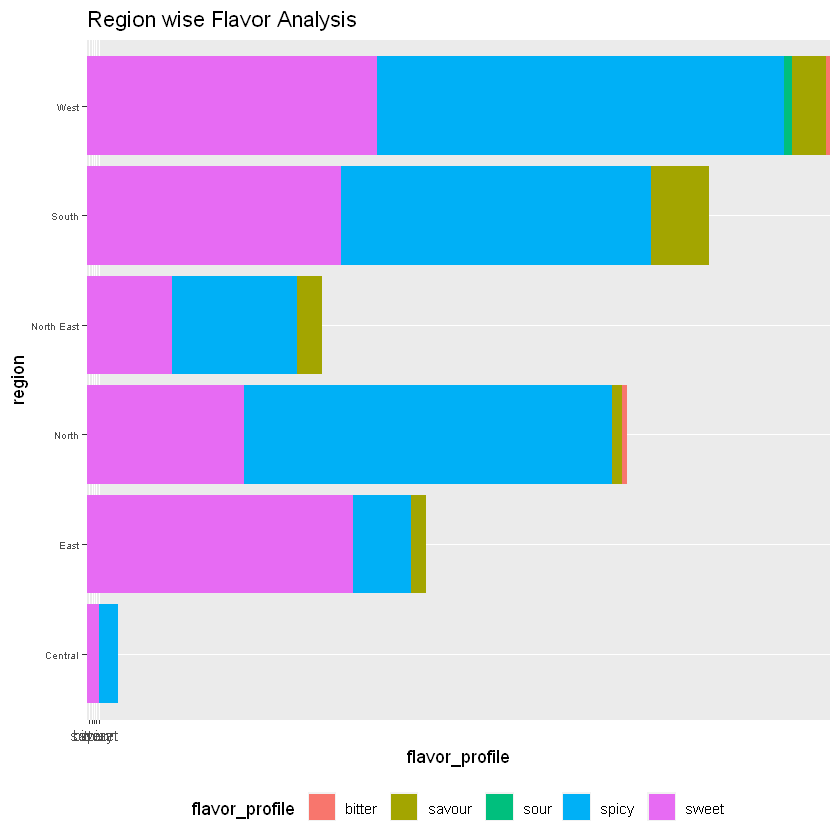

In [97]:
print(Region_flavor)

## To show course in each region

In [98]:
Region_course=ggplot(d,aes(x=region,y=course,fill=course))+geom_col()+
  ggtitle('Region wise Flavor Analysis')+coord_flip()+theme(legend.position = 'bottom',
                                                            axis.text.y =  element_text(size=6))

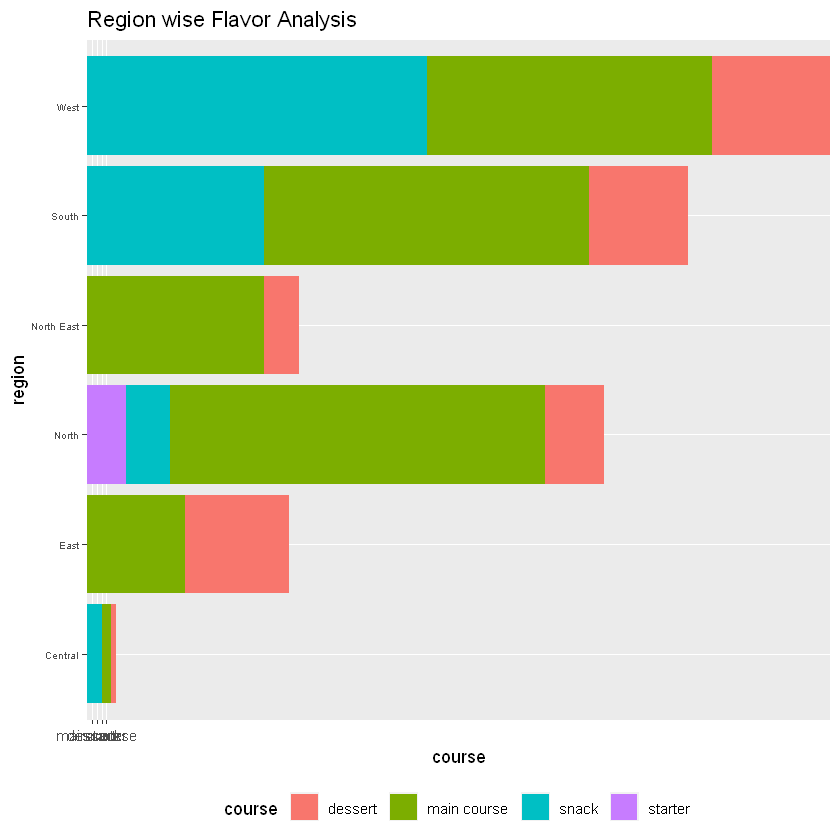

In [99]:
Region_course

# Conclusion

- From this data set, It's showing that there were 255 variety of food items in this data.
- Among this vegetarian food items were more. The food items in non veg were very less compared to vegetarian.
- There is no much difference between cooking and preparation time of vegetarian and non vegetarian foods.
- The food items were mainly sweet and spicy flavors. The flavors were different in different regions.
- The spicy food items were mainly from the states such as Chhattisgarh, Gujrat, Haryana, Nagaland, NCT of Delhi,Tripura.